# Dean
## CONAGUA
### Temperatura

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from matplotlib.animation import FuncAnimation
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from matplotlib.colorbar import Colorbar

Datos combinados (reales e interpolados):
       Fecha  PRECIP EVAP  TMAX  TMIN  Latitud  Longitud Tipo
0 2007-08-20    40.0  9.2  32.0  23.0  19.8472  -88.1378  NaN
1 2007-08-20    53.6  7.0  35.6  23.7  19.5667  -88.0500  NaN
2 2007-08-20    62.5  2.2  27.0  Nulo  19.0219  -88.1108  NaN
3 2007-08-20    19.0  4.8  33.0    20  18.7036  -88.2578  NaN
4 2007-08-20    76.0  3.9  31.0  Nulo  18.8131  -88.5728  NaN


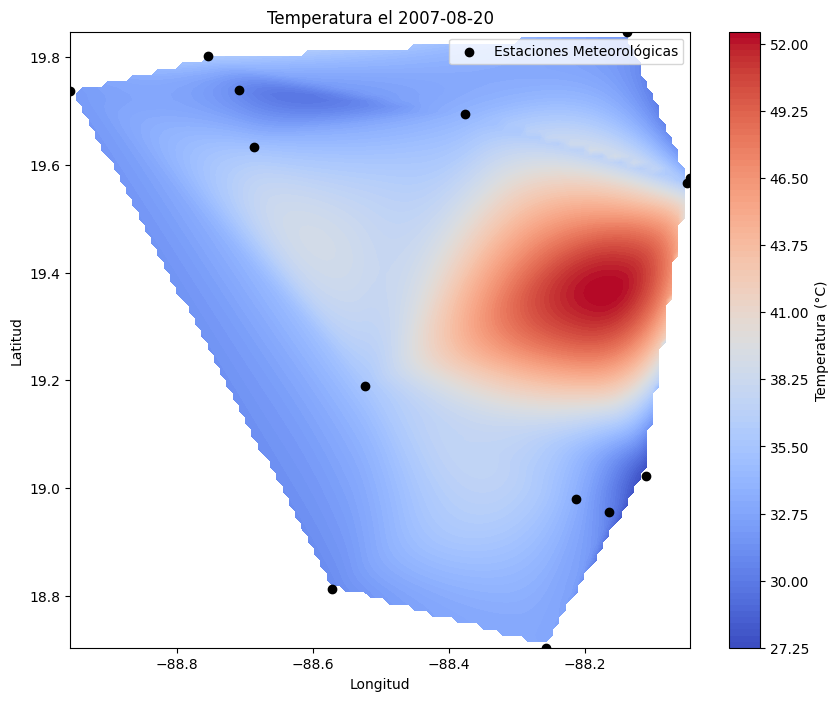

In [2]:
# Información de las estaciones meteorológicas
estaciones_info = {
    'Est23022': {'lon': -88.1378, 'lat': 19.8472, 'archivo': 'Est23022.xlsx'},
    'Est23158': {'lon': -87.7139, 'lat': 18.7058, 'archivo': 'Est23158.xlsx'},
    'Est23045': {'lon': -88.05, 'lat': 19.5667, 'archivo': 'Est23045.xlsx'},
    'Est23042': {'lon': -88.1108, 'lat': 19.0219, 'archivo': 'Est23042.xlsx'},
    'Est23171': {'lon': -88.2578, 'lat': 18.7036, 'archivo': 'Est23171.xlsx'},
    'Est23160': {'lon': -88.5728, 'lat': 18.8131, 'archivo': 'Est23160.xlsx'},
    'Est23167': {'lon': -88.8333, 'lat': 19.0083, 'archivo': 'Est23167.xlsx'},
    'Est23051': {'lon': -88.1644, 'lat': 18.9547, 'archivo': 'Est23051.xlsx'},
    'Est23033': {'lon': -88.2133, 'lat': 18.9789, 'archivo': 'Est23033.xlsx'},
    'Est23026': {'lon': -88.5239, 'lat': 19.1889, 'archivo': 'Est23026.xlsx'},
    'Est23159': {'lon': -88.9575, 'lat': 19.7378, 'archivo': 'Est23159.xlsx'},
    'Est23041': {'lon': -88.8119, 'lat': 19.9011, 'archivo': 'Est23041.xlsx'},
    'Est23013': {'lon': -88.7544, 'lat': 19.8022, 'archivo': 'Est23013.xlsx'},
    'Est23165': {'lon': -88.7097, 'lat': 19.7389, 'archivo': 'Est23165.xlsx'},
    'Est23044': {'lon': -88.6875, 'lat': 19.6331, 'archivo': 'Est23044.xlsx'},
    'Est23031': {'lon': -88.3764, 'lat': 19.6944, 'archivo': 'Est23031.xlsx'},
    'Est23162': {'lon': -88.3978, 'lat': 19.5014, 'archivo': 'Est23162.xlsx'},
    'Est23003': {'lon': -88.045, 'lat': 19.5756, 'archivo': 'Est23003.xlsx'}
}

# Fecha específica para la visualización
fecha_especifica = pd.Timestamp('2007-08-20')  # Asegúrate de que esta fecha tiene suficientes datos

# Cargar y combinar datos de todas las estaciones para la fecha específica
df_combinado = pd.DataFrame()
for estacion, info in estaciones_info.items():
    df = pd.read_excel(info['archivo'])
    df.replace("NULO", np.nan, inplace=True)
    df['Latitud'] = info['lat']
    df['Longitud'] = info['lon']
    df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')
    df = df[df['Fecha'] == fecha_especifica]
    df['TMAX'] = pd.to_numeric(df['TMAX'], errors='coerce')
    df_combinado = pd.concat([df_combinado, df])

# Filtrar datos para la fecha específica y eliminar NaNs
df_dia_especifico = df_combinado.dropna(subset=['TMAX'])

# Crear malla espacial para la interpolación
lat_min, lat_max = df_dia_especifico['Latitud'].min(), df_dia_especifico['Latitud'].max()
lon_min, lon_max = df_dia_especifico['Longitud'].min(), df_dia_especifico['Longitud'].max()
grid_lat, grid_lon = np.mgrid[lat_min:lat_max:100j, lon_min:lon_max:100j]

# Interpolación de los datos de precipitación
points = df_dia_especifico[['Longitud', 'Latitud']].values
values = df_dia_especifico['TMAX'].values
grid_precip = griddata(points, values, (grid_lon, grid_lat), method='cubic')

# Convertir los datos interpolados en una lista
datos_interpolados = []
for i in range(grid_lon.shape[0]):
    for j in range(grid_lon.shape[1]):
        lon = grid_lon[i, j]
        lat = grid_lat[i, j]
        precip = grid_precip[i, j]
        datos_interpolados.append({'Longitud': lon, 'Latitud': lat, 'TMAX': precip, 'Tipo': 'Interpolado'})

# Añadir los datos interpolados a los datos reales
df_interpolados = pd.DataFrame(datos_interpolados)
df_datos_completos = pd.concat([df_dia_especifico, df_interpolados], ignore_index=True)

# Imprimir los datos combinados
print("Datos combinados (reales e interpolados):")
print(df_datos_completos.head())  # Imprime los primeros registros para revisión

# Dibujar el mapa de contorno
plt.figure(figsize=(10, 8))
contour = plt.contourf(grid_lon, grid_lat, grid_precip, levels=100, cmap='coolwarm')
plt.scatter(df_dia_especifico['Longitud'], df_dia_especifico['Latitud'], color='black', label='Estaciones Meteorológicas')
plt.colorbar(contour, label='Temperatura (°C)')
plt.title(f'Temperatura el {fecha_especifica.strftime("%Y-%m-%d")}')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend()
plt.show()

In [3]:
# Información de las estaciones meteorológicas
estaciones_info = {
    'Est23022': {'lon': -88.1378, 'lat': 19.8472, 'archivo': 'Est23022.xlsx'},
    'Est23158': {'lon': -87.7139, 'lat': 18.7058, 'archivo': 'Est23158.xlsx'},
    'Est23045': {'lon': -88.05, 'lat': 19.5667, 'archivo': 'Est23045.xlsx'},
    'Est23042': {'lon': -88.1108, 'lat': 19.0219, 'archivo': 'Est23042.xlsx'},
    'Est23171': {'lon': -88.2578, 'lat': 18.7036, 'archivo': 'Est23171.xlsx'},
    'Est23160': {'lon': -88.5728, 'lat': 18.8131, 'archivo': 'Est23160.xlsx'},
    'Est23167': {'lon': -88.8333, 'lat': 19.0083, 'archivo': 'Est23167.xlsx'},
    'Est23051': {'lon': -88.1644, 'lat': 18.9547, 'archivo': 'Est23051.xlsx'},
    'Est23033': {'lon': -88.2133, 'lat': 18.9789, 'archivo': 'Est23033.xlsx'},
    'Est23026': {'lon': -88.5239, 'lat': 19.1889, 'archivo': 'Est23026.xlsx'},
    'Est23159': {'lon': -88.9575, 'lat': 19.7378, 'archivo': 'Est23159.xlsx'},
    'Est23041': {'lon': -88.8119, 'lat': 19.9011, 'archivo': 'Est23041.xlsx'},
    'Est23013': {'lon': -88.7544, 'lat': 19.8022, 'archivo': 'Est23013.xlsx'},
    'Est23165': {'lon': -88.7097, 'lat': 19.7389, 'archivo': 'Est23165.xlsx'},
    'Est23044': {'lon': -88.6875, 'lat': 19.6331, 'archivo': 'Est23044.xlsx'},
    'Est23031': {'lon': -88.3764, 'lat': 19.6944, 'archivo': 'Est23031.xlsx'},
    'Est23162': {'lon': -88.3978, 'lat': 19.5014, 'archivo': 'Est23162.xlsx'},
    'Est23003': {'lon': -88.045, 'lat': 19.5756, 'archivo': 'Est23003.xlsx'}
}

# Cargar datos de precipitación de todas las estaciones meteorológicas
datos_precipitacion = pd.DataFrame()
for estacion, info in estaciones_info.items():
    df = pd.read_excel(info['archivo'])
    df.replace("NULO", np.nan, inplace=True)
    df['Latitud'] = info['lat']
    df['Longitud'] = info['lon']
    df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')
    df['TMAX'] = pd.to_numeric(df['TMAX'], errors='coerce')
    datos_precipitacion = pd.concat([datos_precipitacion, df], ignore_index=True)

# Eliminar filas con NaN en la columna 'PRECIP'
datos_precipitacion.dropna(subset=['TMAX'], inplace=True)

# Definir los límites para la visualización
lat_min, lat_max = datos_precipitacion['Latitud'].min(), datos_precipitacion['Latitud'].max()
lon_min, lon_max = datos_precipitacion['Longitud'].min(), datos_precipitacion['Longitud'].max()

# Crear la figura para la animación
fig, ax = plt.subplots(figsize=(10, 8))

# Función para actualizar el gráfico de contorno para cada frame
def update(frame):
    ax.clear()
    df_dia = datos_precipitacion[datos_precipitacion['Fecha'] == frame]
    if df_dia.empty:
        return []

    points = df_dia[['Longitud', 'Latitud']]
    values = df_dia['TMAX']
    grid_lat, grid_lon = np.mgrid[lat_min:lat_max:100j, lon_min:lon_max:100j]
    grid_precip = griddata(points, values, (grid_lon, grid_lat), method='cubic')

    contour = ax.contourf(grid_lon, grid_lat, grid_precip, levels=100, cmap='coolwarm')
    ax.scatter(df_dia['Longitud'], df_dia['Latitud'], color='black', label='Estaciones Meteorológicas')
    ax.set_title(f'Temperatura el {frame.strftime("%Y-%m-%d")}')
    ax.set_xlabel('Longitud')
    ax.set_ylabel('Latitud')
    return contour

# Crear la animación
anim = FuncAnimation(fig, update, frames=pd.date_range(datos_precipitacion['Fecha'].min(), datos_precipitacion['Fecha'].max()), blit=False)

# Guardar la animación como GIF
anim.save('temperatura_animacion.gif', writer='pillow', fps=2)

plt.close()

In [4]:
# Asumiendo que 'estaciones_info' ya está definido como antes

# Preparar los datos
datos_precipitacion = pd.DataFrame()
for estacion, info in estaciones_info.items():
    df = pd.read_excel(info['archivo'])
    df.replace("NULO", np.nan, inplace=True)
    df['Latitud'] = info['lat']
    df['Longitud'] = info['lon']
    df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')
    df['TMAX'] = pd.to_numeric(df['TMAX'], errors='coerce')
    datos_precipitacion = pd.concat([datos_precipitacion, df], ignore_index=True)

# Eliminar filas con NaN en 'TMAX'
datos_precipitacion.dropna(subset=['TMAX'], inplace=True)

# Crear la figura y ajustar para la barra de colores
fig, ax = plt.subplots(figsize=(10, 8))
plt.subplots_adjust(right=0.8)
cax = fig.add_axes([0.85, 0.15, 0.05, 0.7])

# Configuración inicial de la barra de colores
norm = Normalize(vmin=datos_precipitacion['TMAX'].min(), vmax=datos_precipitacion['TMAX'].max())
sm = ScalarMappable(norm=norm, cmap='coolwarm')
sm.set_array([])
cbar = plt.colorbar(sm, cax=cax)
cbar.set_label('Temperatura máxima (°C)')

# Función de actualización para la animación
def update(frame):
    ax.clear()
    df_dia = datos_precipitacion[datos_precipitacion['Fecha'] == frame]
    if not df_dia.empty:
        points = df_dia[['Longitud', 'Latitud']].values
        values = df_dia['TMAX'].values
        if len(np.unique(points, axis=0)) >= 4:  # Verificar si hay suficientes puntos únicos
            grid_lat, grid_lon = np.mgrid[datos_precipitacion['Latitud'].min():datos_precipitacion['Latitud'].max():100j, datos_precipitacion['Longitud'].min():datos_precipitacion['Longitud'].max():100j]
            grid_tmax = griddata(points, values, (grid_lon, grid_lat), method='cubic')
            ax.contourf(grid_lon, grid_lat, grid_tmax, levels=100, cmap='coolwarm', norm=norm)
        else:
            print(f"No hay suficientes puntos únicos para la interpolación cúbica en la fecha {frame}.")
    ax.scatter(df_dia['Longitud'], df_dia['Latitud'], color='black', s=10, label='Estaciones Meteorológicas')
    ax.set_title(f'Temperatura máxima el {frame.strftime("%Y-%m-%d")}')
    ax.set_xlabel('Longitud')
    ax.set_ylabel('Latitud')
    ax.legend()

# Animación
anim = FuncAnimation(fig, update, frames=pd.date_range(datos_precipitacion['Fecha'].min(), datos_precipitacion['Fecha'].max()).normalize(), blit=False)

# Guardar la animación como GIF
anim.save('temperatura_animacion_int_cubic.gif', writer='pillow', fps=1)

plt.close()

In [5]:
# Información de las estaciones meteorológicas - actualiza con tus archivos
estaciones_info = {
    'Est23022': {'lon': -88.1378, 'lat': 19.8472, 'archivo': 'Est23022.xlsx'},
    'Est23158': {'lon': -87.7139, 'lat': 18.7058, 'archivo': 'Est23158.xlsx'},
    'Est23045': {'lon': -88.05, 'lat': 19.5667, 'archivo': 'Est23045.xlsx'},
    'Est23042': {'lon': -88.1108, 'lat': 19.0219, 'archivo': 'Est23042.xlsx'},
    'Est23171': {'lon': -88.2578, 'lat': 18.7036, 'archivo': 'Est23171.xlsx'},
    'Est23160': {'lon': -88.5728, 'lat': 18.8131, 'archivo': 'Est23160.xlsx'},
    'Est23167': {'lon': -88.8333, 'lat': 19.0083, 'archivo': 'Est23167.xlsx'},
    'Est23051': {'lon': -88.1644, 'lat': 18.9547, 'archivo': 'Est23051.xlsx'},
    'Est23033': {'lon': -88.2133, 'lat': 18.9789, 'archivo': 'Est23033.xlsx'},
    'Est23026': {'lon': -88.5239, 'lat': 19.1889, 'archivo': 'Est23026.xlsx'},
    'Est23159': {'lon': -88.9575, 'lat': 19.7378, 'archivo': 'Est23159.xlsx'},
    'Est23041': {'lon': -88.8119, 'lat': 19.9011, 'archivo': 'Est23041.xlsx'},
    'Est23013': {'lon': -88.7544, 'lat': 19.8022, 'archivo': 'Est23013.xlsx'},
    'Est23165': {'lon': -88.7097, 'lat': 19.7389, 'archivo': 'Est23165.xlsx'},
    'Est23044': {'lon': -88.6875, 'lat': 19.6331, 'archivo': 'Est23044.xlsx'},
    'Est23031': {'lon': -88.3764, 'lat': 19.6944, 'archivo': 'Est23031.xlsx'},
    'Est23162': {'lon': -88.3978, 'lat': 19.5014, 'archivo': 'Est23162.xlsx'},
    'Est23003': {'lon': -88.045, 'lat': 19.5756, 'archivo': 'Est23003.xlsx'}
}

# Preparación de los datos
datos_precipitacion = pd.DataFrame()
for estacion, info in estaciones_info.items():
    df = pd.read_excel(info['archivo'])
    df.replace("NULO", np.nan, inplace=True)
    df['Latitud'] = info['lat']
    df['Longitud'] = info['lon']
    df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')
    df['TMAX'] = pd.to_numeric(df['TMAX'], errors='coerce')
    datos_precipitacion = pd.concat([datos_precipitacion, df], ignore_index=True)

# Eliminación de filas con NaN en 'TMAX'
datos_precipitacion.dropna(subset=['TMAX'], inplace=True)

# Límites para la visualización
lat_min, lat_max = datos_precipitacion['Latitud'].min(), datos_precipitacion['Latitud'].max()
lon_min, lon_max = datos_precipitacion['Longitud'].min(), datos_precipitacion['Longitud'].max()

# Creación de la figura y ajustes para la barra de colores
fig, ax = plt.subplots(figsize=(10, 8))
plt.subplots_adjust(right=0.8)
cax = fig.add_axes([0.85, 0.15, 0.05, 0.7])

# Configuración inicial de la barra de colores
norm = Normalize(vmin=datos_precipitacion['TMAX'].min(), vmax=datos_precipitacion['TMAX'].max())
sm = ScalarMappable(norm=norm, cmap='coolwarm')
sm.set_array([])
cbar = Colorbar(ax=cax, mappable=sm)
cbar.set_label('Temperatura máxima (°C)')

# Función de actualización para la animación
def update(frame):
    ax.clear()
    df_dia = datos_precipitacion[datos_precipitacion['Fecha'] == frame]
    if not df_dia.empty:
        points = df_dia[['Longitud', 'Latitud']].values
        values = df_dia['TMAX'].values
        grid_lat, grid_lon = np.mgrid[lat_min:lat_max:100j, lon_min:lon_max:100j]
        grid_tmax = griddata(points, values, (grid_lon, grid_lat), method='linear')
        contourf = ax.contourf(grid_lon, grid_lat, grid_tmax, levels=100, cmap='coolwarm', norm=norm)
    ax.scatter(df_dia['Longitud'], df_dia['Latitud'], color='black', s=10, label='Estaciones Meteorológicas')
    ax.set_title(f'Temperatura máxima el {frame.strftime("%Y-%m-%d")}')
    ax.set_xlabel('Longitud')
    ax.set_ylabel('Latitud')
    ax.legend()

# Animación
anim = FuncAnimation(fig, update, frames=pd.date_range(datos_precipitacion['Fecha'].min(), datos_precipitacion['Fecha'].max()).normalize(), blit=False)

# Guardar la animación como GIF
anim.save('temperatura_animacion_int_lineal.gif', writer='pillow', fps=1)

plt.close()

### Precipitación

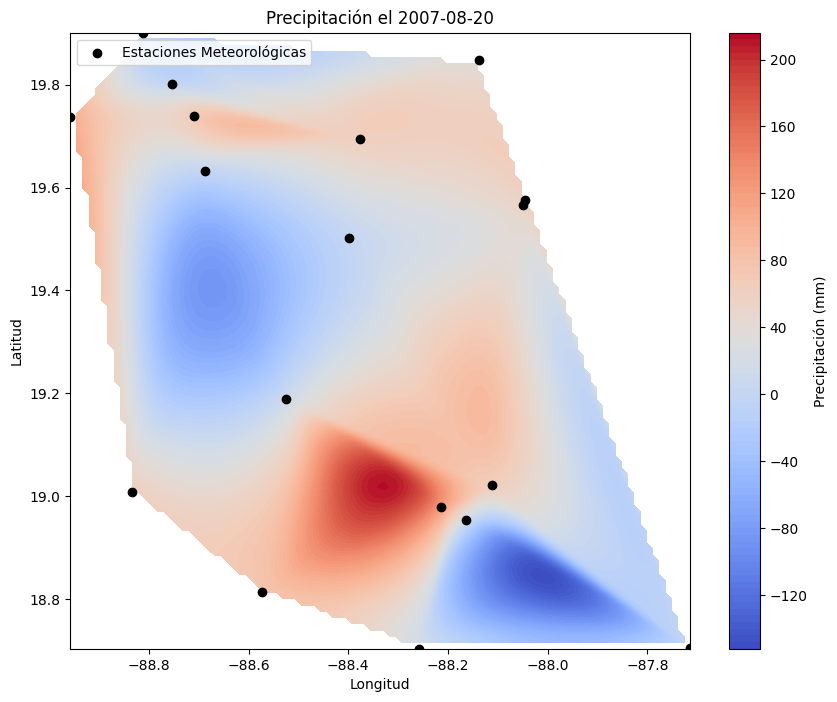

In [6]:
# Información de las estaciones meteorológicas
estaciones_info = {
    'Est23022': {'lon': -88.1378, 'lat': 19.8472, 'archivo': 'Est23022.xlsx'},
    'Est23158': {'lon': -87.7139, 'lat': 18.7058, 'archivo': 'Est23158.xlsx'},
    'Est23045': {'lon': -88.05, 'lat': 19.5667, 'archivo': 'Est23045.xlsx'},
    'Est23042': {'lon': -88.1108, 'lat': 19.0219, 'archivo': 'Est23042.xlsx'},
    'Est23171': {'lon': -88.2578, 'lat': 18.7036, 'archivo': 'Est23171.xlsx'},
    'Est23160': {'lon': -88.5728, 'lat': 18.8131, 'archivo': 'Est23160.xlsx'},
    'Est23167': {'lon': -88.8333, 'lat': 19.0083, 'archivo': 'Est23167.xlsx'},
    'Est23051': {'lon': -88.1644, 'lat': 18.9547, 'archivo': 'Est23051.xlsx'},
    'Est23033': {'lon': -88.2133, 'lat': 18.9789, 'archivo': 'Est23033.xlsx'},
    'Est23026': {'lon': -88.5239, 'lat': 19.1889, 'archivo': 'Est23026.xlsx'},
    'Est23159': {'lon': -88.9575, 'lat': 19.7378, 'archivo': 'Est23159.xlsx'},
    'Est23041': {'lon': -88.8119, 'lat': 19.9011, 'archivo': 'Est23041.xlsx'},
    'Est23013': {'lon': -88.7544, 'lat': 19.8022, 'archivo': 'Est23013.xlsx'},
    'Est23165': {'lon': -88.7097, 'lat': 19.7389, 'archivo': 'Est23165.xlsx'},
    'Est23044': {'lon': -88.6875, 'lat': 19.6331, 'archivo': 'Est23044.xlsx'},
    'Est23031': {'lon': -88.3764, 'lat': 19.6944, 'archivo': 'Est23031.xlsx'},
    'Est23162': {'lon': -88.3978, 'lat': 19.5014, 'archivo': 'Est23162.xlsx'},
    'Est23003': {'lon': -88.045, 'lat': 19.5756, 'archivo': 'Est23003.xlsx'}
}

# Fecha específica para la visualización
fecha_especifica = pd.Timestamp('2007-08-20')  # Asegúrate de que esta fecha tiene suficientes datos

# Cargar y combinar datos de todas las estaciones para la fecha específica
df_combinado = pd.DataFrame()
for estacion, info in estaciones_info.items():
    df = pd.read_excel(info['archivo'])
    df.replace("NULO", np.nan, inplace=True)
    df['Latitud'] = info['lat']
    df['Longitud'] = info['lon']
    df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')
    df = df[df['Fecha'] == fecha_especifica]
    df['PRECIP'] = pd.to_numeric(df['PRECIP'], errors='coerce')
    df_combinado = pd.concat([df_combinado, df])

# Filtrar datos para la fecha específica y eliminar NaNs
df_dia_especifico = df_combinado.dropna(subset=['PRECIP'])

# Verificar y explorar los datos
if df_dia_especifico.empty:
    raise ValueError("No hay datos de precipitación para la fecha seleccionada.")

# Crear malla espacial para la interpolación
lat_min, lat_max = df_dia_especifico['Latitud'].min(), df_dia_especifico['Latitud'].max()
lon_min, lon_max = df_dia_especifico['Longitud'].min(), df_dia_especifico['Longitud'].max()
grid_lat, grid_lon = np.mgrid[lat_min:lat_max:100j, lon_min:lon_max:100j]

# Interpolación de los datos de precipitación
points = df_dia_especifico[['Longitud', 'Latitud']].values
values = df_dia_especifico['PRECIP'].values
grid_precip = griddata(points, values, (grid_lon, grid_lat), method='cubic')

# Dibujar el mapa de contorno
plt.figure(figsize=(10, 8))
contour = plt.contourf(grid_lon, grid_lat, grid_precip, levels=100, cmap='coolwarm')
plt.scatter(df_dia_especifico['Longitud'], df_dia_especifico['Latitud'], color='black', label='Estaciones Meteorológicas')
plt.colorbar(contour, label='Precipitación (mm)')
plt.title(f'Precipitación el {fecha_especifica.strftime("%Y-%m-%d")}')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend()
plt.show()

In [7]:
# Información de las estaciones meteorológicas
estaciones_info = {
    'Est23022': {'lon': -88.1378, 'lat': 19.8472, 'archivo': 'Est23022.xlsx'},
    'Est23158': {'lon': -87.7139, 'lat': 18.7058, 'archivo': 'Est23158.xlsx'},
    'Est23045': {'lon': -88.05, 'lat': 19.5667, 'archivo': 'Est23045.xlsx'},
    'Est23042': {'lon': -88.1108, 'lat': 19.0219, 'archivo': 'Est23042.xlsx'},
    'Est23171': {'lon': -88.2578, 'lat': 18.7036, 'archivo': 'Est23171.xlsx'},
    'Est23160': {'lon': -88.5728, 'lat': 18.8131, 'archivo': 'Est23160.xlsx'},
    'Est23167': {'lon': -88.8333, 'lat': 19.0083, 'archivo': 'Est23167.xlsx'},
    'Est23051': {'lon': -88.1644, 'lat': 18.9547, 'archivo': 'Est23051.xlsx'},
    'Est23033': {'lon': -88.2133, 'lat': 18.9789, 'archivo': 'Est23033.xlsx'},
    'Est23026': {'lon': -88.5239, 'lat': 19.1889, 'archivo': 'Est23026.xlsx'},
    'Est23159': {'lon': -88.9575, 'lat': 19.7378, 'archivo': 'Est23159.xlsx'},
    'Est23041': {'lon': -88.8119, 'lat': 19.9011, 'archivo': 'Est23041.xlsx'},
    'Est23013': {'lon': -88.7544, 'lat': 19.8022, 'archivo': 'Est23013.xlsx'},
    'Est23165': {'lon': -88.7097, 'lat': 19.7389, 'archivo': 'Est23165.xlsx'},
    'Est23044': {'lon': -88.6875, 'lat': 19.6331, 'archivo': 'Est23044.xlsx'},
    'Est23031': {'lon': -88.3764, 'lat': 19.6944, 'archivo': 'Est23031.xlsx'},
    'Est23162': {'lon': -88.3978, 'lat': 19.5014, 'archivo': 'Est23162.xlsx'},
    'Est23003': {'lon': -88.045, 'lat': 19.5756, 'archivo': 'Est23003.xlsx'}
}

# Cargar datos de precipitación de todas las estaciones meteorológicas
datos_precipitacion = pd.DataFrame()
for estacion, info in estaciones_info.items():
    df = pd.read_excel(info['archivo'])
    df.replace("NULO", np.nan, inplace=True)
    df['Latitud'] = info['lat']
    df['Longitud'] = info['lon']
    df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')
    df['PRECIP'] = pd.to_numeric(df['PRECIP'], errors='coerce')
    datos_precipitacion = pd.concat([datos_precipitacion, df], ignore_index=True)

# Eliminar filas con NaN en la columna 'PRECIP'
datos_precipitacion.dropna(subset=['PRECIP'], inplace=True)

# Definir los límites para la visualización
lat_min, lat_max = datos_precipitacion['Latitud'].min(), datos_precipitacion['Latitud'].max()
lon_min, lon_max = datos_precipitacion['Longitud'].min(), datos_precipitacion['Longitud'].max()

# Crear la figura para la animación
fig, ax = plt.subplots(figsize=(10, 8))

# Función para actualizar el gráfico de contorno para cada frame
def update(frame):
    ax.clear()
    df_dia = datos_precipitacion[datos_precipitacion['Fecha'] == frame]
    if df_dia.empty:
        return []

    points = df_dia[['Longitud', 'Latitud']]
    values = df_dia['PRECIP']
    grid_lat, grid_lon = np.mgrid[lat_min:lat_max:100j, lon_min:lon_max:100j]
    grid_precip = griddata(points, values, (grid_lon, grid_lat), method='cubic')

    contour = ax.contourf(grid_lon, grid_lat, grid_precip, levels=100, cmap='coolwarm')
    ax.scatter(df_dia['Longitud'], df_dia['Latitud'], color='black', label='Estaciones Meteorológicas')
    ax.set_title(f'Precipitación el {frame.strftime("%Y-%m-%d")}')
    ax.set_xlabel('Longitud')
    ax.set_ylabel('Latitud')
    return contour

# Crear la animación
anim = FuncAnimation(fig, update, frames=pd.date_range(datos_precipitacion['Fecha'].min(), datos_precipitacion['Fecha'].max()), blit=False)

# Guardar la animación como GIF
anim.save('precipitacion_animacion.gif', writer='pillow', fps=2)

plt.close()

In [8]:
# Asumiendo que 'estaciones_info' ya está definido como antes

# Preparar los datos
datos_precipitacion = pd.DataFrame()
for estacion, info in estaciones_info.items():
    df = pd.read_excel(info['archivo'])
    df.replace("NULO", np.nan, inplace=True)
    df['Latitud'] = info['lat']
    df['Longitud'] = info['lon']
    df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')
    df['PRECIP'] = pd.to_numeric(df['PRECIP'], errors='coerce')
    datos_precipitacion = pd.concat([datos_precipitacion, df], ignore_index=True)

# Eliminar filas con NaN en 'TMAX'
datos_precipitacion.dropna(subset=['PRECIP'], inplace=True)

# Crear la figura y ajustar para la barra de colores
fig, ax = plt.subplots(figsize=(10, 8))
plt.subplots_adjust(right=0.8)
cax = fig.add_axes([0.85, 0.15, 0.05, 0.7])

# Configuración inicial de la barra de colores
norm = Normalize(vmin=datos_precipitacion['PRECIP'].min(), vmax=datos_precipitacion['PRECIP'].max())
sm = ScalarMappable(norm=norm, cmap='coolwarm')
sm.set_array([])
cbar = plt.colorbar(sm, cax=cax)
cbar.set_label('Precipitación (mm)')

# Función de actualización para la animación
def update(frame):
    ax.clear()
    df_dia = datos_precipitacion[datos_precipitacion['Fecha'] == frame]
    if not df_dia.empty:
        points = df_dia[['Longitud', 'Latitud']].values
        values = df_dia['PRECIP'].values
        if len(np.unique(points, axis=0)) >= 4:  # Verificar si hay suficientes puntos únicos
            grid_lat, grid_lon = np.mgrid[datos_precipitacion['Latitud'].min():datos_precipitacion['Latitud'].max():100j, datos_precipitacion['Longitud'].min():datos_precipitacion['Longitud'].max():100j]
            grid_tmax = griddata(points, values, (grid_lon, grid_lat), method='cubic')
            ax.contourf(grid_lon, grid_lat, grid_tmax, levels=100, cmap='coolwarm', norm=norm)
        else:
            print(f"No hay suficientes puntos únicos para la interpolación cúbica en la fecha {frame}.")
    ax.scatter(df_dia['Longitud'], df_dia['Latitud'], color='black', s=10, label='Estaciones Meteorológicas')
    ax.set_title(f'Precipitación el {frame.strftime("%Y-%m-%d")}')
    ax.set_xlabel('Longitud')
    ax.set_ylabel('Latitud')
    ax.legend()

# Animación
anim = FuncAnimation(fig, update, frames=pd.date_range(datos_precipitacion['Fecha'].min(), datos_precipitacion['Fecha'].max()).normalize(), blit=False)

# Guardar la animación como GIF
anim.save('precipitación_animacion_int_cubic.gif', writer='pillow', fps=1)

plt.close()

In [9]:
# Información de las estaciones meteorológicas - actualiza con tus archivos
estaciones_info = {
    'Est23022': {'lon': -88.1378, 'lat': 19.8472, 'archivo': 'Est23022.xlsx'},
    'Est23158': {'lon': -87.7139, 'lat': 18.7058, 'archivo': 'Est23158.xlsx'},
    'Est23045': {'lon': -88.05, 'lat': 19.5667, 'archivo': 'Est23045.xlsx'},
    'Est23042': {'lon': -88.1108, 'lat': 19.0219, 'archivo': 'Est23042.xlsx'},
    'Est23171': {'lon': -88.2578, 'lat': 18.7036, 'archivo': 'Est23171.xlsx'},
    'Est23160': {'lon': -88.5728, 'lat': 18.8131, 'archivo': 'Est23160.xlsx'},
    'Est23167': {'lon': -88.8333, 'lat': 19.0083, 'archivo': 'Est23167.xlsx'},
    'Est23051': {'lon': -88.1644, 'lat': 18.9547, 'archivo': 'Est23051.xlsx'},
    'Est23033': {'lon': -88.2133, 'lat': 18.9789, 'archivo': 'Est23033.xlsx'},
    'Est23026': {'lon': -88.5239, 'lat': 19.1889, 'archivo': 'Est23026.xlsx'},
    'Est23159': {'lon': -88.9575, 'lat': 19.7378, 'archivo': 'Est23159.xlsx'},
    'Est23041': {'lon': -88.8119, 'lat': 19.9011, 'archivo': 'Est23041.xlsx'},
    'Est23013': {'lon': -88.7544, 'lat': 19.8022, 'archivo': 'Est23013.xlsx'},
    'Est23165': {'lon': -88.7097, 'lat': 19.7389, 'archivo': 'Est23165.xlsx'},
    'Est23044': {'lon': -88.6875, 'lat': 19.6331, 'archivo': 'Est23044.xlsx'},
    'Est23031': {'lon': -88.3764, 'lat': 19.6944, 'archivo': 'Est23031.xlsx'},
    'Est23162': {'lon': -88.3978, 'lat': 19.5014, 'archivo': 'Est23162.xlsx'},
    'Est23003': {'lon': -88.045, 'lat': 19.5756, 'archivo': 'Est23003.xlsx'}
}

# Preparación de los datos
datos_precipitacion = pd.DataFrame()
for estacion, info in estaciones_info.items():
    df = pd.read_excel(info['archivo'])
    df.replace("NULO", np.nan, inplace=True)
    df['Latitud'] = info['lat']
    df['Longitud'] = info['lon']
    df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')
    df['PRECIP'] = pd.to_numeric(df['PRECIP'], errors='coerce')
    datos_precipitacion = pd.concat([datos_precipitacion, df], ignore_index=True)

# Eliminación de filas con NaN en 'PRECIP'
datos_precipitacion.dropna(subset=['PRECIP'], inplace=True)

# Límites para la visualización
lat_min, lat_max = datos_precipitacion['Latitud'].min(), datos_precipitacion['Latitud'].max()
lon_min, lon_max = datos_precipitacion['Longitud'].min(), datos_precipitacion['Longitud'].max()

# Creación de la figura y ajustes para la barra de colores
fig, ax = plt.subplots(figsize=(10, 8))
plt.subplots_adjust(right=0.8)
cax = fig.add_axes([0.85, 0.15, 0.05, 0.7])

# Configuración inicial de la barra de colores
norm = Normalize(vmin=datos_precipitacion['PRECIP'].min(), vmax=datos_precipitacion['PRECIP'].max())
sm = ScalarMappable(norm=norm, cmap='coolwarm')
sm.set_array([])
cbar = Colorbar(ax=cax, mappable=sm)
cbar.set_label('Precipitación (mm)')

# Función de actualización para la animación
def update(frame):
    ax.clear()
    df_dia = datos_precipitacion[datos_precipitacion['Fecha'] == frame]
    if not df_dia.empty:
        points = df_dia[['Longitud', 'Latitud']].values
        values = df_dia['PRECIP'].values
        grid_lat, grid_lon = np.mgrid[lat_min:lat_max:100j, lon_min:lon_max:100j]
        grid_tmax = griddata(points, values, (grid_lon, grid_lat), method='linear')
        contourf = ax.contourf(grid_lon, grid_lat, grid_tmax, levels=100, cmap='coolwarm', norm=norm)
    ax.scatter(df_dia['Longitud'], df_dia['Latitud'], color='black', s=10, label='Estaciones Meteorológicas')
    ax.set_title(f'Precipitación el {frame.strftime("%Y-%m-%d")}')
    ax.set_xlabel('Longitud')
    ax.set_ylabel('Latitud')
    ax.legend()

# Animación
anim = FuncAnimation(fig, update, frames=pd.date_range(datos_precipitacion['Fecha'].min(), datos_precipitacion['Fecha'].max()).normalize(), blit=False)

# Guardar la animación como GIF
anim.save('precipitación_animacion_int_lineal.gif', writer='pillow', fps=1)

plt.close()

## NASA
### Temperatura

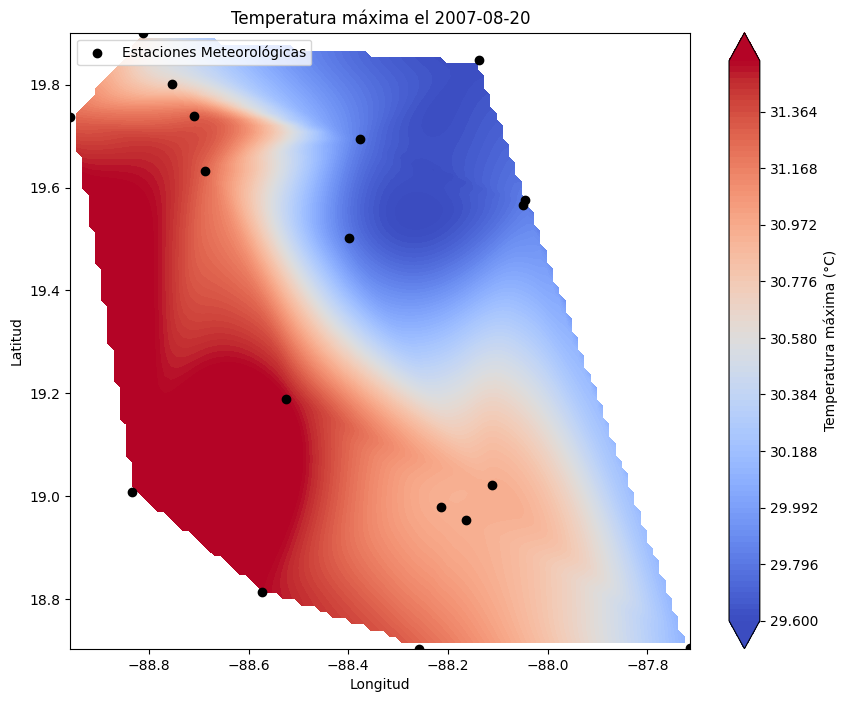

In [10]:
# Información de las estaciones meteorológicas
estaciones_info = {
    'Est23022NASA': {'lon': -88.1378, 'lat': 19.8472, 'archivo': 'Est23022NASA.xlsx'},
    'Est23158NASA': {'lon': -87.7139, 'lat': 18.7058, 'archivo': 'Est23158NASA.xlsx'},
    'Est23045NASA': {'lon': -88.05, 'lat': 19.5667, 'archivo': 'Est23045NASA.xlsx'},
    'Est23042NASA': {'lon': -88.1108, 'lat': 19.0219, 'archivo': 'Est23042NASA.xlsx'},
    'Est23171NASA': {'lon': -88.2578, 'lat': 18.7036, 'archivo': 'Est23171NASA.xlsx'},
    'Est23160NASA': {'lon': -88.5728, 'lat': 18.8131, 'archivo': 'Est23160NASA.xlsx'},
    'Est23167NASA': {'lon': -88.8333, 'lat': 19.0083, 'archivo': 'Est23167NASA.xlsx'},
    'Est23051NASA': {'lon': -88.1644, 'lat': 18.9547, 'archivo': 'Est23051NASA.xlsx'},
    'Est23033NASA': {'lon': -88.2133, 'lat': 18.9789, 'archivo': 'Est23033NASA.xlsx'},
    'Est23026NASA': {'lon': -88.5239, 'lat': 19.1889, 'archivo': 'Est23026NASA.xlsx'},
    'Est23159NASA': {'lon': -88.9575, 'lat': 19.7378, 'archivo': 'Est23159NASA.xlsx'},
    'Est23041NASA': {'lon': -88.8119, 'lat': 19.9011, 'archivo': 'Est23041NASA.xlsx'},
    'Est23013NASA': {'lon': -88.7544, 'lat': 19.8022, 'archivo': 'Est23013NASA.xlsx'},
    'Est23165NASA': {'lon': -88.7097, 'lat': 19.7389, 'archivo': 'Est23165NASA.xlsx'},
    'Est23044NASA': {'lon': -88.6875, 'lat': 19.6331, 'archivo': 'Est23044NASA.xlsx'},
    'Est23031NASA': {'lon': -88.3764, 'lat': 19.6944, 'archivo': 'Est23031NASA.xlsx'},
    'Est23162NASA': {'lon': -88.3978, 'lat': 19.5014, 'archivo': 'Est23162NASA.xlsx'},
    'Est23003NASA': {'lon': -88.045, 'lat': 19.5756, 'archivo': 'Est23003NASA.xlsx'}
}

# Fecha específica para la visualización
fecha_especifica = pd.Timestamp('2007-08-20')

# Cargar y combinar datos de todas las estaciones para la fecha específica
df_combinado = pd.DataFrame()
for estacion, info in estaciones_info.items():
    df = pd.read_excel(info['archivo'])
    df.replace("NULO", np.nan, inplace=True)
    df['Latitud'] = info['lat']
    df['Longitud'] = info['lon']
    df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')
    df = df[df['Fecha'] == fecha_especifica]
    df['TMAX'] = pd.to_numeric(df['TMAX'], errors='coerce')
    df_combinado = pd.concat([df_combinado, df])

# Filtrar datos para la fecha específica y eliminar NaNs en 'TMAX'
df_dia_especifico = df_combinado.dropna(subset=['TMAX'])

# Definir los niveles de contorno y la barra de colores basados en el rango de TMAX
min_temp, max_temp = df_dia_especifico['TMAX'].min(), df_dia_especifico['TMAX'].max()
levels = np.linspace(min_temp, max_temp, 100)

# Crear malla espacial para la interpolación
lat_min, lat_max = df_dia_especifico['Latitud'].min(), df_dia_especifico['Latitud'].max()
lon_min, lon_max = df_dia_especifico['Longitud'].min(), df_dia_especifico['Longitud'].max()
grid_lat, grid_lon = np.mgrid[lat_min:lat_max:100j, lon_min:lon_max:100j]

# Interpolación de los datos de temperatura máxima
points = df_dia_especifico[['Longitud', 'Latitud']].values
values = df_dia_especifico['TMAX'].values
grid_temp = griddata(points, values, (grid_lon, grid_lat), method='cubic')

# Dibujar el mapa de contorno
plt.figure(figsize=(10, 8))
contourf = plt.contourf(grid_lon, grid_lat, grid_temp, levels=levels, cmap='coolwarm', extend='both')
plt.scatter(df_dia_especifico['Longitud'], df_dia_especifico['Latitud'], color='black', label='Estaciones Meteorológicas')
cbar = plt.colorbar(contourf)
cbar.set_label('Temperatura máxima (°C)')
plt.title(f'Temperatura máxima el {fecha_especifica.strftime("%Y-%m-%d")}')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend()
plt.show()

In [11]:
# Asumiendo que estaciones_info ya está definido como antes

# Preparar los datos combinados de todas las estaciones y todas las fechas
df_combinado = pd.DataFrame()
for estacion, info in estaciones_info.items():
    df = pd.read_excel(info['archivo'])
    df.replace("NULO", np.nan, inplace=True)
    df['Latitud'] = info['lat']
    df['Longitud'] = info['lon']
    df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')
    df['TMAX'] = pd.to_numeric(df['TMAX'], errors='coerce')
    df_combinado = pd.concat([df_combinado, df], ignore_index=True)

# Eliminar filas con NaN en 'TMAX'
df_combinado.dropna(subset=['TMAX'], inplace=True)

# Crear figura y ejes para la animación, incluyendo la barra de colores
fig, ax = plt.subplots(figsize=(10, 8))
plt.subplots_adjust(right=0.85)
cax = fig.add_axes([0.9, 0.15, 0.03, 0.7])

# Inicializar la barra de colores fuera de la función de actualización
norm = plt.Normalize(vmin=df_combinado['TMAX'].min(), vmax=df_combinado['TMAX'].max())
sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=norm)
sm.set_array([])
plt.colorbar(sm, cax=cax, label='Temperatura máxima (°C)')

def init():
    ax.clear()

# Función para actualizar el frame de la animación
def update(frame):
    ax.clear()
    df_fecha = df_combinado[df_combinado['Fecha'] == frame]
    if not df_fecha.empty:
        points = df_fecha[['Longitud', 'Latitud']].values
        values = df_fecha['TMAX'].values
        # Asegurarse de que hay suficientes puntos para la interpolación
        if len(points) >= 4:
            grid_lat, grid_lon = np.mgrid[df_combinado['Latitud'].min():df_combinado['Latitud'].max():100j, df_combinado['Longitud'].min():df_combinado['Longitud'].max():100j]
            grid_precip = griddata(points, values, (grid_lon, grid_lat), method='cubic')
            contourf = ax.contourf(grid_lon, grid_lat, grid_precip, levels=100, cmap='coolwarm', extend='both')
        ax.scatter(df_fecha['Longitud'], df_fecha['Latitud'], color='black', s=10, label='Estaciones Meteorológicas')
    ax.set_title(f'Temperatura el {frame.strftime("%Y-%m-%d")}')
    ax.set_xlabel('Longitud')
    ax.set_ylabel('Latitud')
    ax.legend()

# Crear y configurar la animación
anim = FuncAnimation(fig, update, frames=pd.date_range(df_combinado['Fecha'].min(), df_combinado['Fecha'].max()).normalize(), init_func=init, blit=False)

# Guardar la animación
anim.save('temperatura_NASA_animacion.gif', writer='pillow', fps=1)

plt.close()

### Precipitación

Datos combinados (reales e interpolados):
       Fecha  PRECIP   TMAX   TMIN    Vel  Latitud  Longitud Tipo
0 2007-08-20   10.09  29.60  23.61   1.79  19.8472  -88.1378  NaN
1 2007-08-20    9.34  30.08  27.78  17.82  18.7058  -87.7139  NaN
2 2007-08-20   11.94  29.82  24.33   3.44  19.5667  -88.0500  NaN
3 2007-08-20   11.85  30.94  24.78   6.16  19.0219  -88.1108  NaN
4 2007-08-20   10.89  31.29  25.78   7.98  18.7036  -88.2578  NaN


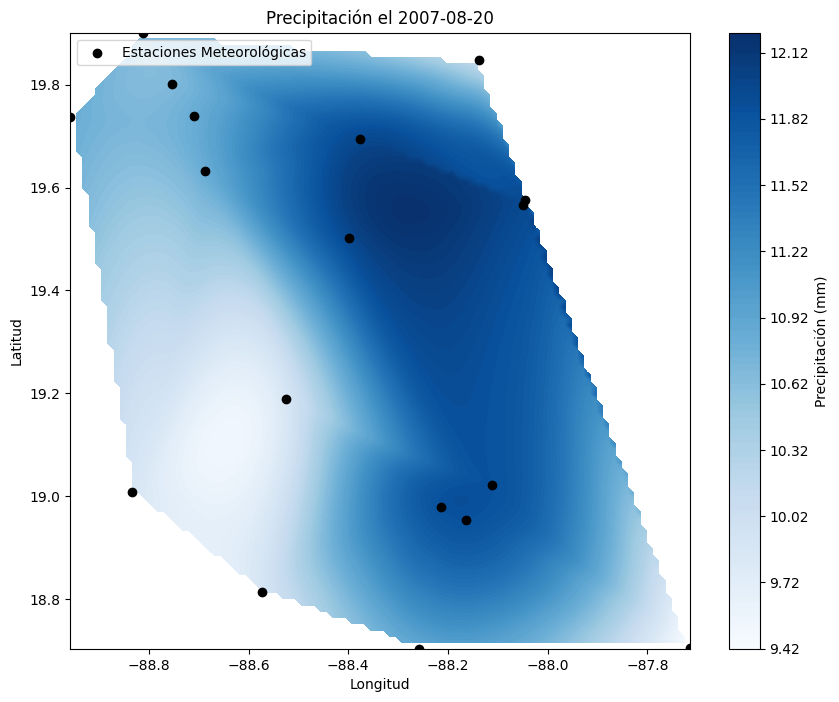

In [12]:
# Información de las estaciones meteorológicas
estaciones_info = {
    'Est23022NASA': {'lon': -88.1378, 'lat': 19.8472, 'archivo': 'Est23022NASA.xlsx'},
    'Est23158NASA': {'lon': -87.7139, 'lat': 18.7058, 'archivo': 'Est23158NASA.xlsx'},
    'Est23045NASA': {'lon': -88.05, 'lat': 19.5667, 'archivo': 'Est23045NASA.xlsx'},
    'Est23042NASA': {'lon': -88.1108, 'lat': 19.0219, 'archivo': 'Est23042NASA.xlsx'},
    'Est23171NASA': {'lon': -88.2578, 'lat': 18.7036, 'archivo': 'Est23171NASA.xlsx'},
    'Est23160NASA': {'lon': -88.5728, 'lat': 18.8131, 'archivo': 'Est23160NASA.xlsx'},
    'Est23167NASA': {'lon': -88.8333, 'lat': 19.0083, 'archivo': 'Est23167NASA.xlsx'},
    'Est23051NASA': {'lon': -88.1644, 'lat': 18.9547, 'archivo': 'Est23051NASA.xlsx'},
    'Est23033NASA': {'lon': -88.2133, 'lat': 18.9789, 'archivo': 'Est23033NASA.xlsx'},
    'Est23026NASA': {'lon': -88.5239, 'lat': 19.1889, 'archivo': 'Est23026NASA.xlsx'},
    'Est23159NASA': {'lon': -88.9575, 'lat': 19.7378, 'archivo': 'Est23159NASA.xlsx'},
    'Est23041NASA': {'lon': -88.8119, 'lat': 19.9011, 'archivo': 'Est23041NASA.xlsx'},
    'Est23013NASA': {'lon': -88.7544, 'lat': 19.8022, 'archivo': 'Est23013NASA.xlsx'},
    'Est23165NASA': {'lon': -88.7097, 'lat': 19.7389, 'archivo': 'Est23165NASA.xlsx'},
    'Est23044NASA': {'lon': -88.6875, 'lat': 19.6331, 'archivo': 'Est23044NASA.xlsx'},
    'Est23031NASA': {'lon': -88.3764, 'lat': 19.6944, 'archivo': 'Est23031NASA.xlsx'},
    'Est23162NASA': {'lon': -88.3978, 'lat': 19.5014, 'archivo': 'Est23162NASA.xlsx'},
    'Est23003NASA': {'lon': -88.045, 'lat': 19.5756, 'archivo': 'Est23003NASA.xlsx'}
}

# Fecha específica para la visualización
fecha_especifica = pd.Timestamp('2007-08-20')  # Asegúrate de que esta fecha tiene suficientes datos

# Cargar y combinar datos de todas las estaciones para la fecha específica
df_combinado = pd.DataFrame()
for estacion, info in estaciones_info.items():
    df = pd.read_excel(info['archivo'])
    df.replace("NULO", np.nan, inplace=True)
    df['Latitud'] = info['lat']
    df['Longitud'] = info['lon']
    df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')
    df = df[df['Fecha'] == fecha_especifica]
    df['PRECIP'] = pd.to_numeric(df['PRECIP'], errors='coerce')
    df_combinado = pd.concat([df_combinado, df])

# Filtrar datos para la fecha específica y eliminar NaNs
df_dia_especifico = df_combinado.dropna(subset=['PRECIP'])

# Crear malla espacial para la interpolación
lat_min, lat_max = df_dia_especifico['Latitud'].min(), df_dia_especifico['Latitud'].max()
lon_min, lon_max = df_dia_especifico['Longitud'].min(), df_dia_especifico['Longitud'].max()
grid_lat, grid_lon = np.mgrid[lat_min:lat_max:100j, lon_min:lon_max:100j]

# Interpolación de los datos de precipitación
points = df_dia_especifico[['Longitud', 'Latitud']].values
values = df_dia_especifico['PRECIP'].values
grid_precip = griddata(points, values, (grid_lon, grid_lat), method='cubic')

# Convertir los datos interpolados en una lista
datos_interpolados = []
for i in range(grid_lon.shape[0]):
    for j in range(grid_lon.shape[1]):
        lon = grid_lon[i, j]
        lat = grid_lat[i, j]
        precip = grid_precip[i, j]
        datos_interpolados.append({'Longitud': lon, 'Latitud': lat, 'PRECIP': precip, 'Tipo': 'Interpolado'})

# Añadir los datos interpolados a los datos reales
df_interpolados = pd.DataFrame(datos_interpolados)
df_datos_completos = pd.concat([df_dia_especifico, df_interpolados], ignore_index=True)

# Imprimir los datos combinados
print("Datos combinados (reales e interpolados):")
print(df_datos_completos.head())  # Imprime los primeros registros para revisión

# Dibujar el mapa de contorno
plt.figure(figsize=(10, 8))
contour = plt.contourf(grid_lon, grid_lat, grid_precip, levels=100, cmap='Blues')
plt.scatter(df_dia_especifico['Longitud'], df_dia_especifico['Latitud'], color='black', label='Estaciones Meteorológicas')
plt.colorbar(contour, label='Precipitación (mm)')
plt.title(f'Precipitación el {fecha_especifica.strftime("%Y-%m-%d")}')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend()
plt.show()

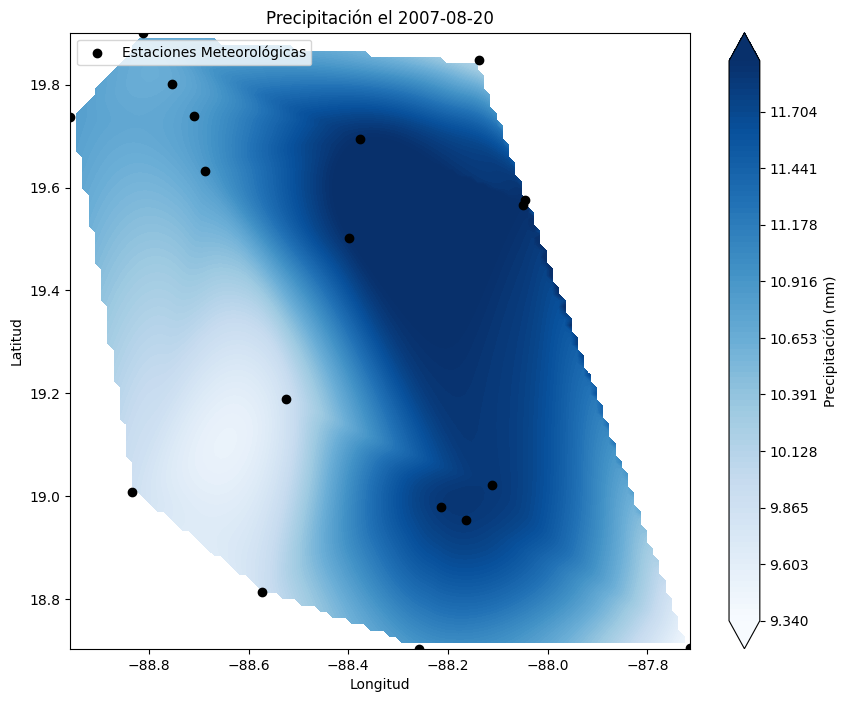

In [13]:
# Información de las estaciones meteorológicas
estaciones_info = {
    'Est23022NASA': {'lon': -88.1378, 'lat': 19.8472, 'archivo': 'Est23022NASA.xlsx'},
    'Est23158NASA': {'lon': -87.7139, 'lat': 18.7058, 'archivo': 'Est23158NASA.xlsx'},
    'Est23045NASA': {'lon': -88.05, 'lat': 19.5667, 'archivo': 'Est23045NASA.xlsx'},
    'Est23042NASA': {'lon': -88.1108, 'lat': 19.0219, 'archivo': 'Est23042NASA.xlsx'},
    'Est23171NASA': {'lon': -88.2578, 'lat': 18.7036, 'archivo': 'Est23171NASA.xlsx'},
    'Est23160NASA': {'lon': -88.5728, 'lat': 18.8131, 'archivo': 'Est23160NASA.xlsx'},
    'Est23167NASA': {'lon': -88.8333, 'lat': 19.0083, 'archivo': 'Est23167NASA.xlsx'},
    'Est23051NASA': {'lon': -88.1644, 'lat': 18.9547, 'archivo': 'Est23051NASA.xlsx'},
    'Est23033NASA': {'lon': -88.2133, 'lat': 18.9789, 'archivo': 'Est23033NASA.xlsx'},
    'Est23026NASA': {'lon': -88.5239, 'lat': 19.1889, 'archivo': 'Est23026NASA.xlsx'},
    'Est23159NASA': {'lon': -88.9575, 'lat': 19.7378, 'archivo': 'Est23159NASA.xlsx'},
    'Est23041NASA': {'lon': -88.8119, 'lat': 19.9011, 'archivo': 'Est23041NASA.xlsx'},
    'Est23013NASA': {'lon': -88.7544, 'lat': 19.8022, 'archivo': 'Est23013NASA.xlsx'},
    'Est23165NASA': {'lon': -88.7097, 'lat': 19.7389, 'archivo': 'Est23165NASA.xlsx'},
    'Est23044NASA': {'lon': -88.6875, 'lat': 19.6331, 'archivo': 'Est23044NASA.xlsx'},
    'Est23031NASA': {'lon': -88.3764, 'lat': 19.6944, 'archivo': 'Est23031NASA.xlsx'},
    'Est23162NASA': {'lon': -88.3978, 'lat': 19.5014, 'archivo': 'Est23162NASA.xlsx'},
    'Est23003NASA': {'lon': -88.045, 'lat': 19.5756, 'archivo': 'Est23003NASA.xlsx'}
}

# Fecha específica para la visualización
fecha_especifica = pd.Timestamp('2007-08-20')

# Cargar y combinar datos de todas las estaciones para la fecha específica
df_combinado = pd.DataFrame()
for estacion, info in estaciones_info.items():
    df = pd.read_excel(info['archivo'])
    df.replace("NULO", np.nan, inplace=True)
    df['Latitud'] = info['lat']
    df['Longitud'] = info['lon']
    df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')
    df = df[df['Fecha'] == fecha_especifica]
    df['PRECIP'] = pd.to_numeric(df['PRECIP'], errors='coerce')
    df_combinado = pd.concat([df_combinado, df])

# Filtrar datos para la fecha específica y eliminar NaNs en 'TMAX'
df_dia_especifico = df_combinado.dropna(subset=['PRECIP'])

# Definir los niveles de contorno y la barra de colores basados en el rango de TMAX
min_temp, max_temp = df_dia_especifico['PRECIP'].min(), df_dia_especifico['PRECIP'].max()
levels = np.linspace(min_temp, max_temp, 100)

# Crear malla espacial para la interpolación
lat_min, lat_max = df_dia_especifico['Latitud'].min(), df_dia_especifico['Latitud'].max()
lon_min, lon_max = df_dia_especifico['Longitud'].min(), df_dia_especifico['Longitud'].max()
grid_lat, grid_lon = np.mgrid[lat_min:lat_max:100j, lon_min:lon_max:100j]

# Interpolación de los datos de temperatura máxima
points = df_dia_especifico[['Longitud', 'Latitud']].values
values = df_dia_especifico['PRECIP'].values
grid_temp = griddata(points, values, (grid_lon, grid_lat), method='cubic')

# Dibujar el mapa de contorno
plt.figure(figsize=(10, 8))
contourf = plt.contourf(grid_lon, grid_lat, grid_temp, levels=levels, cmap='Blues', extend='both')
plt.scatter(df_dia_especifico['Longitud'], df_dia_especifico['Latitud'], color='black', label='Estaciones Meteorológicas')
cbar = plt.colorbar(contourf)
cbar.set_label('Precipitación (mm)')
plt.title(f'Precipitación el {fecha_especifica.strftime("%Y-%m-%d")}')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend()
plt.show()

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from matplotlib.animation import FuncAnimation

# Asumiendo que estaciones_info ya está definido como antes

# Preparar los datos combinados de todas las estaciones y todas las fechas
df_combinado = pd.DataFrame()
for estacion, info in estaciones_info.items():
    df = pd.read_excel(info['archivo'])
    df.replace("NULO", np.nan, inplace=True)
    df['Latitud'] = info['lat']
    df['Longitud'] = info['lon']
    df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')
    df['PRECIP'] = pd.to_numeric(df['PRECIP'], errors='coerce')
    df_combinado = pd.concat([df_combinado, df], ignore_index=True)

# Eliminar filas con NaN en 'PRECIP'
df_combinado.dropna(subset=['PRECIP'], inplace=True)

# Crear figura y ejes para la animación, incluyendo la barra de colores
fig, ax = plt.subplots(figsize=(10, 8))
plt.subplots_adjust(right=0.85)
cax = fig.add_axes([0.9, 0.15, 0.03, 0.7])

# Inicializar la barra de colores fuera de la función de actualización
norm = plt.Normalize(vmin=df_combinado['PRECIP'].min(), vmax=df_combinado['PRECIP'].max())
sm = plt.cm.ScalarMappable(cmap="Blues", norm=norm)
sm.set_array([])
plt.colorbar(sm, cax=cax, label='Precipitación (mm)')

def init():
    ax.clear()

# Función para actualizar el frame de la animación
def update(frame):
    ax.clear()
    df_fecha = df_combinado[df_combinado['Fecha'] == frame]
    if not df_fecha.empty:
        points = df_fecha[['Longitud', 'Latitud']].values
        values = df_fecha['PRECIP'].values
        # Asegurarse de que hay suficientes puntos para la interpolación
        if len(points) >= 4:
            grid_lat, grid_lon = np.mgrid[df_combinado['Latitud'].min():df_combinado['Latitud'].max():100j, df_combinado['Longitud'].min():df_combinado['Longitud'].max():100j]
            grid_precip = griddata(points, values, (grid_lon, grid_lat), method='cubic')
            contourf = ax.contourf(grid_lon, grid_lat, grid_precip, levels=100, cmap='Blues', extend='both')
        ax.scatter(df_fecha['Longitud'], df_fecha['Latitud'], color='black', s=10, label='Estaciones Meteorológicas')
    ax.set_title(f'Precipitación el {frame.strftime("%Y-%m-%d")}')
    ax.set_xlabel('Longitud')
    ax.set_ylabel('Latitud')
    ax.legend()

# Crear y configurar la animación
anim = FuncAnimation(fig, update, frames=pd.date_range(df_combinado['Fecha'].min(), df_combinado['Fecha'].max()).normalize(), init_func=init, blit=False)

# Guardar la animación
anim.save('precipitación_NASA_animacion.gif', writer='pillow', fps=1)

plt.close()


### Viento

Datos combinados (reales e interpolados):
       Fecha  PRECIP   TMAX   TMIN    Vel  Latitud  Longitud Tipo
0 2007-08-20   10.09  29.60  23.61   1.79  19.8472  -88.1378  NaN
1 2007-08-20    9.34  30.08  27.78  17.82  18.7058  -87.7139  NaN
2 2007-08-20   11.94  29.82  24.33   3.44  19.5667  -88.0500  NaN
3 2007-08-20   11.85  30.94  24.78   6.16  19.0219  -88.1108  NaN
4 2007-08-20   10.89  31.29  25.78   7.98  18.7036  -88.2578  NaN


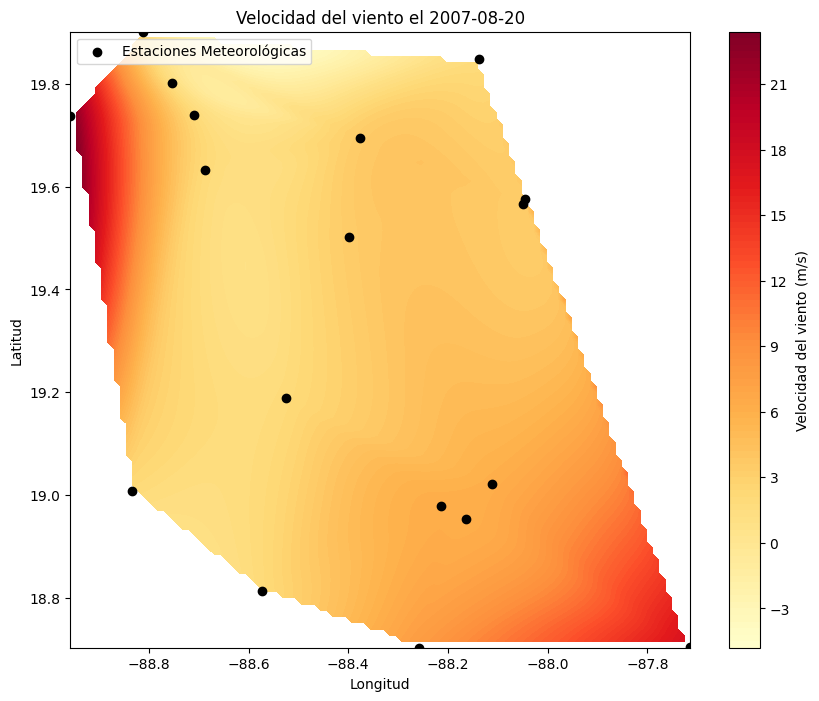

In [15]:
# Información de las estaciones meteorológicas
estaciones_info = {
    'Est23022NASA': {'lon': -88.1378, 'lat': 19.8472, 'archivo': 'Est23022NASA.xlsx'},
    'Est23158NASA': {'lon': -87.7139, 'lat': 18.7058, 'archivo': 'Est23158NASA.xlsx'},
    'Est23045NASA': {'lon': -88.05, 'lat': 19.5667, 'archivo': 'Est23045NASA.xlsx'},
    'Est23042NASA': {'lon': -88.1108, 'lat': 19.0219, 'archivo': 'Est23042NASA.xlsx'},
    'Est23171NASA': {'lon': -88.2578, 'lat': 18.7036, 'archivo': 'Est23171NASA.xlsx'},
    'Est23160NASA': {'lon': -88.5728, 'lat': 18.8131, 'archivo': 'Est23160NASA.xlsx'},
    'Est23167NASA': {'lon': -88.8333, 'lat': 19.0083, 'archivo': 'Est23167NASA.xlsx'},
    'Est23051NASA': {'lon': -88.1644, 'lat': 18.9547, 'archivo': 'Est23051NASA.xlsx'},
    'Est23033NASA': {'lon': -88.2133, 'lat': 18.9789, 'archivo': 'Est23033NASA.xlsx'},
    'Est23026NASA': {'lon': -88.5239, 'lat': 19.1889, 'archivo': 'Est23026NASA.xlsx'},
    'Est23159NASA': {'lon': -88.9575, 'lat': 19.7378, 'archivo': 'Est23159NASA.xlsx'},
    'Est23041NASA': {'lon': -88.8119, 'lat': 19.9011, 'archivo': 'Est23041NASA.xlsx'},
    'Est23013NASA': {'lon': -88.7544, 'lat': 19.8022, 'archivo': 'Est23013NASA.xlsx'},
    'Est23165NASA': {'lon': -88.7097, 'lat': 19.7389, 'archivo': 'Est23165NASA.xlsx'},
    'Est23044NASA': {'lon': -88.6875, 'lat': 19.6331, 'archivo': 'Est23044NASA.xlsx'},
    'Est23031NASA': {'lon': -88.3764, 'lat': 19.6944, 'archivo': 'Est23031NASA.xlsx'},
    'Est23162NASA': {'lon': -88.3978, 'lat': 19.5014, 'archivo': 'Est23162NASA.xlsx'},
    'Est23003NASA': {'lon': -88.045, 'lat': 19.5756, 'archivo': 'Est23003NASA.xlsx'}
}

# Fecha específica para la visualización
fecha_especifica = pd.Timestamp('2007-08-20')  # Asegúrate de que esta fecha tiene suficientes datos

# Cargar y combinar datos de todas las estaciones para la fecha específica
df_combinado = pd.DataFrame()
for estacion, info in estaciones_info.items():
    df = pd.read_excel(info['archivo'])
    df.replace("NULO", np.nan, inplace=True)
    df['Latitud'] = info['lat']
    df['Longitud'] = info['lon']
    df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')
    df = df[df['Fecha'] == fecha_especifica]
    df['Vel'] = pd.to_numeric(df['Vel'], errors='coerce')
    df_combinado = pd.concat([df_combinado, df])

# Filtrar datos para la fecha específica y eliminar NaNs
df_dia_especifico = df_combinado.dropna(subset=['Vel'])

# Crear malla espacial para la interpolación
lat_min, lat_max = df_dia_especifico['Latitud'].min(), df_dia_especifico['Latitud'].max()
lon_min, lon_max = df_dia_especifico['Longitud'].min(), df_dia_especifico['Longitud'].max()
grid_lat, grid_lon = np.mgrid[lat_min:lat_max:100j, lon_min:lon_max:100j]

# Interpolación de los datos de precipitación
points = df_dia_especifico[['Longitud', 'Latitud']].values
values = df_dia_especifico['Vel'].values
grid_precip = griddata(points, values, (grid_lon, grid_lat), method='cubic')

# Convertir los datos interpolados en una lista
datos_interpolados = []
for i in range(grid_lon.shape[0]):
    for j in range(grid_lon.shape[1]):
        lon = grid_lon[i, j]
        lat = grid_lat[i, j]
        precip = grid_precip[i, j]
        datos_interpolados.append({'Longitud': lon, 'Latitud': lat, 'Vel': precip, 'Tipo': 'Interpolado'})

# Añadir los datos interpolados a los datos reales
df_interpolados = pd.DataFrame(datos_interpolados)
df_datos_completos = pd.concat([df_dia_especifico, df_interpolados], ignore_index=True)

# Imprimir los datos combinados
print("Datos combinados (reales e interpolados):")
print(df_datos_completos.head())  # Imprime los primeros registros para revisión

# Dibujar el mapa de contorno
plt.figure(figsize=(10, 8))
contour = plt.contourf(grid_lon, grid_lat, grid_precip, levels=100, cmap='YlOrRd')
plt.scatter(df_dia_especifico['Longitud'], df_dia_especifico['Latitud'], color='black', label='Estaciones Meteorológicas')
plt.colorbar(contour, label='Velocidad del viento (m/s)')
plt.title(f'Velocidad del viento el {fecha_especifica.strftime("%Y-%m-%d")}')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend()
plt.show()

In [16]:
# Asumiendo que estaciones_info ya está definido como antes

# Preparar los datos combinados de todas las estaciones y todas las fechas
df_combinado = pd.DataFrame()
for estacion, info in estaciones_info.items():
    df = pd.read_excel(info['archivo'])
    df.replace("NULO", np.nan, inplace=True)
    df['Latitud'] = info['lat']
    df['Longitud'] = info['lon']
    df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')
    df['Vel'] = pd.to_numeric(df['Vel'], errors='coerce')
    df_combinado = pd.concat([df_combinado, df], ignore_index=True)

# Eliminar filas con NaN en 'Vel'
df_combinado.dropna(subset=['Vel'], inplace=True)

# Crear figura y ejes para la animación, incluyendo la barra de colores
fig, ax = plt.subplots(figsize=(10, 8))
plt.subplots_adjust(right=0.85)
cax = fig.add_axes([0.9, 0.15, 0.03, 0.7])

# Inicializar la barra de colores fuera de la función de actualización
norm = plt.Normalize(vmin=df_combinado['Vel'].min(), vmax=df_combinado['Vel'].max())
sm = plt.cm.ScalarMappable(cmap="YlOrRd", norm=norm)
sm.set_array([])
plt.colorbar(sm, cax=cax, label='Velocidad del viento (m/s)')

def init():
    ax.clear()

# Función para actualizar el frame de la animación
def update(frame):
    ax.clear()
    df_fecha = df_combinado[df_combinado['Fecha'] == frame]
    if not df_fecha.empty:
        points = df_fecha[['Longitud', 'Latitud']].values
        values = df_fecha['Vel'].values
        # Asegurarse de que hay suficientes puntos para la interpolación
        if len(points) >= 4:
            grid_lat, grid_lon = np.mgrid[df_combinado['Latitud'].min():df_combinado['Latitud'].max():100j, df_combinado['Longitud'].min():df_combinado['Longitud'].max():100j]
            grid_precip = griddata(points, values, (grid_lon, grid_lat), method='cubic')
            contourf = ax.contourf(grid_lon, grid_lat, grid_precip, levels=100, cmap='YlOrRd', extend='both')
        ax.scatter(df_fecha['Longitud'], df_fecha['Latitud'], color='black', s=10, label='Estaciones Meteorológicas')
    ax.set_title(f'Velocidad del viento el {frame.strftime("%Y-%m-%d")}')
    ax.set_xlabel('Longitud')
    ax.set_ylabel('Latitud')
    ax.legend()

# Crear y configurar la animación
anim = FuncAnimation(fig, update, frames=pd.date_range(df_combinado['Fecha'].min(), df_combinado['Fecha'].max()).normalize(), init_func=init, blit=False)

# Guardar la animación
anim.save('vel_viento_NASA_animacion.gif', writer='pillow', fps=1)

plt.close()